<a href="https://colab.research.google.com/github/mashhisyam/PVCK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


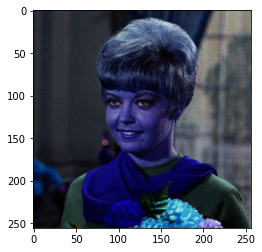

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from tkinter import Frame
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_mandrill = cv.imread('')
plt.imshow(img)

--------------------------------
Masukkan nilai kecerahan: 20


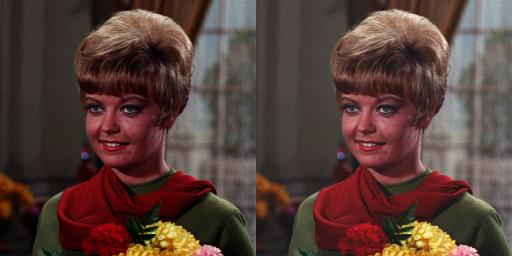

In [ ]:
print ('--------------------------------')
try:
  brightness = int (input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

brightness_image = np.zeros(img.shape, img.dtype)

#akses per piksel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      brightness_image[y,x,c] = np.clip (img[y,x,c] + brightness,0, 255)

# Cara simple tanpa for loop
# Brightness_image = cv.convertScaleAbs(img, beta=brightness)

final_frame = cv.hconcat((img, brightness_image))
cv2_imshow(final_frame)

Mengubah Kontras dan tingkat kecerahan citra
Masukkan nilai kecerahan[-255 - 255]: 120
Masukkan kontras [1.0 - 3.0]2


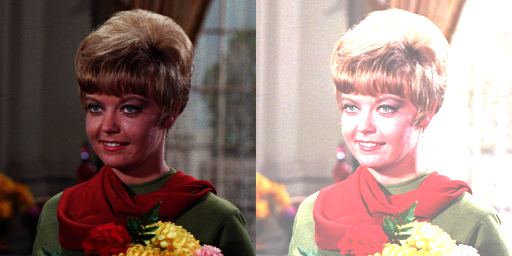

In [ ]:
print('Mengubah Kontras dan tingkat kecerahan citra')
try :
  brightness = int(input('Masukkan nilai kecerahan[-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]'))
except ValueError:
  print('Error, not a number')

contrast_img = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      contrast_img[y,x,c] = np.clip(contrast*img[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((img, contrast_img))
cv2_imshow(final_frame)


Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 20


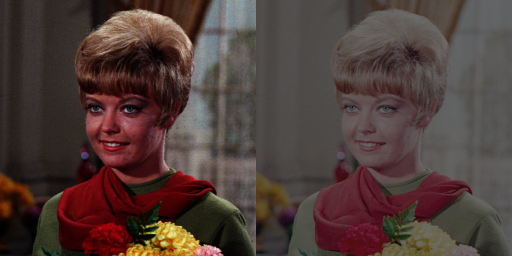

In [ ]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

transform_img = np.zeros(img.shape, img.dtype)


# akses per piksel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      transform_img [y,x,c] = np.clip(brightness * (np.log(1 + img[y,x,c])), 0, 255)

final_frame = cv.hconcat((img, transform_img))
cv2_imshow(final_frame)

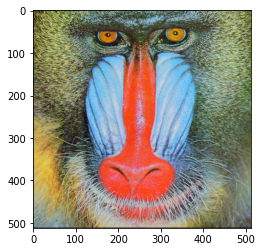

In [ ]:
img_mandrill = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
img_rgb = cv.cvtColor(img_mandrill,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

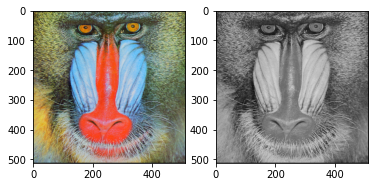

In [ ]:
img_avg = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

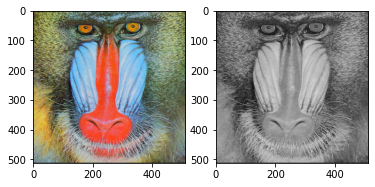

In [ ]:
# nomor 3 (b. Lightness)
img_light = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
img_light[:] = np.max(img_light,axis=-1,keepdims=10)/2+np.min(img_light,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

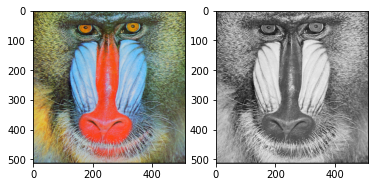

In [ ]:
# nomor 3 (c. Luminance)
image_lum = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
R, G, B = image_lum[:,:,0], image_lum[:,:,1], image_lum[:,:,2]
gray_image_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lum, cmap='gray')

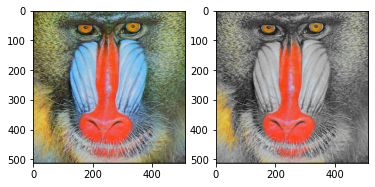

In [50]:
# nomor 4
img_nose = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
ret, mask = cv.threshold(img_nose[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_nose)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img_nose, cv.COLOR_BGR2GRAY)
img_nose = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_nose, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')